Task-02 : Create a K-means clustering algorithm to group customers of a retail store based on their purchase history.

Project Overview: Customer Segmentation with K-means Clustering
1) Implemented advanced data analysis techniques to derive insights from a retail store's customer data.
2) Utilized K-means clustering, a robust unsupervised machine learning algorithm, to explore customer behavior patterns.
3) Examined key features such as 'Age,' 'Annual Income,' and 'Spending Score' to identify distinct customer segments.
4) Applied the Elbow Method meticulously to determine the optimal number of clusters, ensuring precise segmentation.
5) Created compelling visualizations, including a dynamic 3D graph, to illustrate comprehensive patterns within the customer data.
6) Demonstrated the power of data-driven decision-making, enabling businesses to strategize, personalize, and optimize customer experiences with unparalleled precision.

Dataset: https://www.kaggle.com/datasets/vjchoudhary7/customer-segmentation-tutorial-in-python

Import Libraries and Load Data

In [24]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings("ignore")

In [4]:
data = pd.read_csv("Mall_Customers.csv")
data

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [6]:
# Generate summary statistics of the numerical columns in the DataFrame
data.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


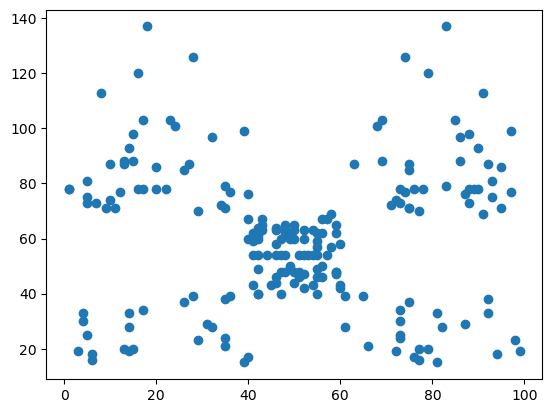

In [36]:
# Visualizing the data using a scatter plot
plt.scatter(data["Spending Score (1-100)"] , data["Annual Income (k$)"])
plt.show()

In [37]:
# Finding the sum of squared within-cluster distances for different number of clusters
ssw = []
clusters = range(1,10)
for i in clusters:
    model = KMeans(n_clusters = i , init='k-means++' , n_init=100)
    model.fit(data[["Spending Score (1-100)" , "Annual Income (k$)"]])
    ssw.append(model.inertia_)

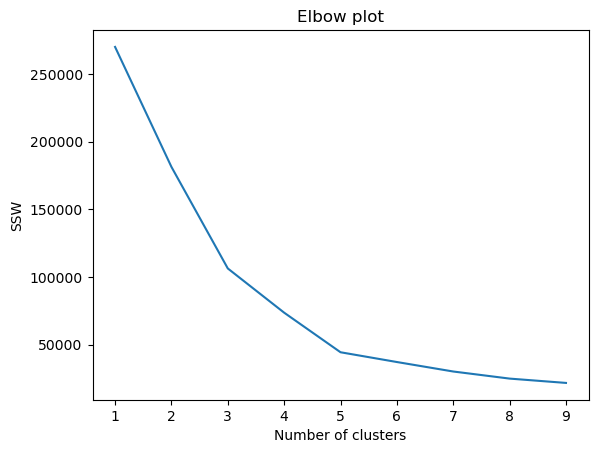

In [38]:
# Plotting the Elbow plot to determine the optimal number of clusters
plt.xlabel("Number of clusters")
plt.ylabel("SSW")
plt.title("Elbow plot")
plt.plot(clusters , ssw)

In [39]:
# Creating a K-means clustering model with the optimal number of clusters
model = KMeans(n_clusters = 5, init='k-means++',n_init=100)
y_predicted  = model.fit_predict(data[["Spending Score (1-100)" , "Annual Income (k$)"]])
y_predicted

array([0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 4,
       0, 1, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 2, 3, 2, 4, 2, 3, 2, 3, 2,
       4, 2, 3, 2, 3, 2, 3, 2, 3, 2, 4, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2,
       3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2,
       3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2,
       3, 2])

In [40]:
# Assigning each data point to a cluster and adding the cluster information to the dataset
data["Group"] = y_predicted

In [34]:
data

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Group
0,1,Male,19,15,39,2
1,2,Male,21,15,81,4
2,3,Female,20,16,6,2
3,4,Female,23,16,77,4
4,5,Female,31,17,40,2
...,...,...,...,...,...,...
195,196,Female,35,120,79,3
196,197,Female,45,126,28,1
197,198,Male,32,126,74,3
198,199,Male,32,137,18,1


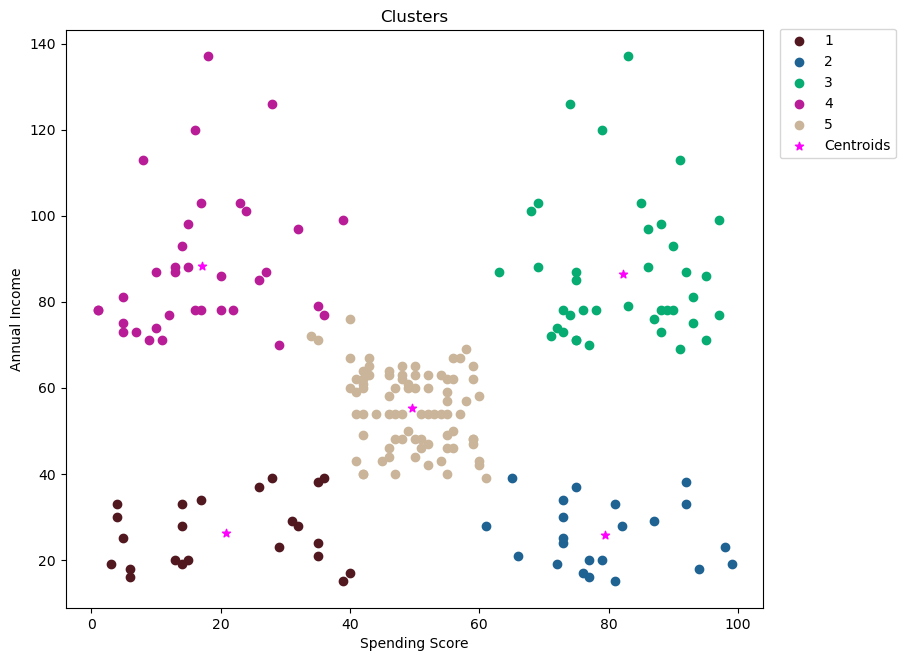

In [41]:
# Separating data points belonging to each cluster
df1=  data[data.Group == 0]
df2=  data[data.Group == 1]
df3=  data[data.Group == 2]
df4=  data[data.Group == 3]
df5=  data[data.Group == 4]

# Visualizing the clusters along with their centroids
plt.figure(figsize = (9,7.5))
plt.scatter(df1["Spending Score (1-100)"] , df1["Annual Income (k$)"]  , color = "#521820" , label = "1")
plt.scatter(df2["Spending Score (1-100)"] , df2["Annual Income (k$)"]  , color = "#1f6393" , label = "2")
plt.scatter(df3["Spending Score (1-100)"] , df3["Annual Income (k$)"] , color = "#06ac72" , label = "3")
plt.scatter(df4["Spending Score (1-100)"] , df4["Annual Income (k$)"], color = "#b91c97" , label = "4")
plt.scatter(df5["Spending Score (1-100)"] , df5["Annual Income (k$)"] , color = "#cab59a" , label = "5")
plt.scatter(model.cluster_centers_[: , 0] ,  model.cluster_centers_[: , 1] , color = "magenta" , marker = "*"  , label =  "Centroids")
plt.legend(loc='upper right'  , bbox_to_anchor=(1.20, 1.015))
plt.title("Clusters")
plt.xlabel("Spending Score")
plt.ylabel("Annual Income")
plt.show()